#  Exploratory Data Analysis

In this notebook, we load the data and  explore the data to answer the following questions
  - Is there a gender determinant to the  accidents
  - Which age group is more risky
  - Fatality rate per sex
  - Which vehicles are more risky
  - The day of the week and month with more fatality
  - Weather condition etc

##  Imports
Get the important packages

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib  for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Get the data 

In [2]:
pwd

'/home/siro/ML/solo/Imbalanced-Learning/Canada_collision/notebooks'

In [3]:
#  Load cleaned data
data = pd.read_csv('../data/clean_data_medicals.csv')
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


In [4]:
data.head(2)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,FATAL,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,Medical,P_SAFE,P_USER,C_CASE
0,1999,January,Monday,9,2,2,Right turn,At an intersection,Clear and sunny,"Dry, normal",...,Light Duty Vehicle,1992,1,F,33,Driver,0,2,1,2890
1,1999,January,Monday,9,2,2,Right turn,At an intersection,Clear and sunny,"Dry, normal",...,Light Duty Vehicle,1992,1,F,70,Driver,1,2,1,2890


In [5]:
data.tail(2)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,FATAL,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,Medical,P_SAFE,P_USER,C_CASE
3632251,2016,December,Sunday,12,2,2,Rear-end collision,Non-intersection,Snowing,Snow,...,Light Duty Vehicle,2010,2,F,25,"Front row, right outboard",0,2,2,2455500
3632252,2016,December,Sunday,12,2,2,Rear-end collision,Non-intersection,Snowing,Snow,...,Light Duty Vehicle,2010,3,F,1,"Second row, center",0,2,2,2455500


In [6]:
# data shape
data.shape

(3632253, 23)

In [7]:
data.columns

Index(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'FATAL', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR', 'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'Medical', 'P_SAFE',
       'P_USER', 'C_CASE'],
      dtype='object')

In [9]:
pd.crosstab(data['Medical'], data['P_SEX'], margins = True, margins_name = 'Total')

P_SEX,F,M,Total
Medical,,,
0,1092847,968631,2061478
1,589049,981726,1570775
Total,1681896,1950357,3632253


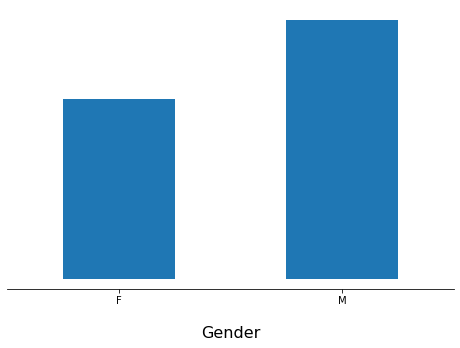

In [11]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
data.groupby('P_SEX')['Medical'].mean().plot(kind='bar',  width=0.5, ax=ax, grid=False)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Switch off ticks
#ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

ax.get_yaxis().set_ticks([])
# Remove title
ax.set_title("")
# Set x-axis label
ax.set_xlabel("Gender", labelpad=20,  size=16)
ax.spines['bottom'].set_position(('outward', 10))
# Set y-axis label
plt.savefig('../Figs/medical_vs_passenger_age.pdf')


In [ ]:
need_medical = data[data.Medical==1]

##  Accidents that needed medical attention
We explore these by looking into various distributions for the male and female. For example
 - What is the medical rate by gender?

In [ ]:
need_medical.head(2)

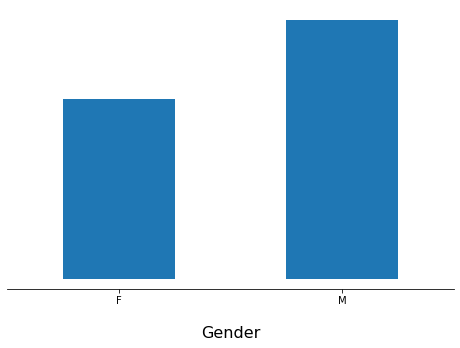

In [12]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
data.groupby('P_SEX')['Medical'].mean().plot(kind='bar',  width=0.5, ax=ax, grid=False)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Switch off ticks
#ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

ax.get_yaxis().set_ticks([])
# Remove title
ax.set_title("")
# Set x-axis label
ax.set_xlabel("Gender", labelpad=20,  size=16)
ax.spines['bottom'].set_position(('outward', 10))
# Set y-axis label
plt.savefig('../Figs/medical_vs_passenger_age.pdf')

In [ ]:
table.values[0]/table.values.sum()

- We can see that almost 2 in 5 females are involved in fatal accidents, whereas 3 in 3 males are involved in fatal accidents

- As we already know from the previous plots that the fatality rate is high for males than females.

- The age vs. sex plot suggests more investigation (see below).

##  What age group are involved in fatal collision?

In [13]:
data.pivot_table('P_AGE', index = 'P_SEX', columns = 'Medical', aggfunc = 'mean')

Medical,0,1
P_SEX,,
F,37.660979,34.070661
M,36.982145,36.270414


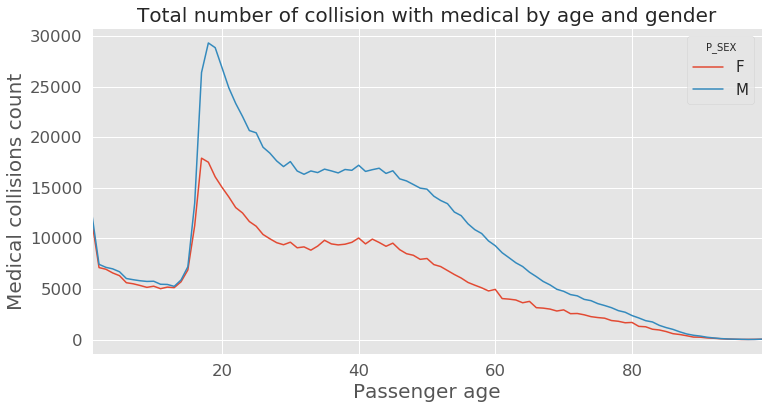

In [14]:
# Set figure size
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

# Plot figure
pivot_tab_age = data.pivot_table('Medical', index = 'P_AGE', columns = 'P_SEX', aggfunc = 'sum')
pivot_tab_age.plot(figsize = (12,6))


plt.xlabel('Passenger age', fontsize = 20)
plt.ylabel('Medical collisions count', fontsize = 20)
plt.legend(title = 'P_SEX', prop={'size': 15})
plt.title('Total number of collision with medical by age and gender', fontsize = 20)
plt.savefig('../Figs/total_collision_vs_page.pdf')

- The plot shows that teenagers at 18 years old (mostly males) involve in most fatal collisions
- The total number of fatal accidents fluctuates slightly between age 22 to 80
- Majority of people (males and females) involved in any sort of collision are  within 19 and 20 years old.

In [15]:
age = pd.cut(data['P_AGE'],[0,18,50,100])
data.pivot_table('Medical', index = ['P_SEX',age], aggfunc = 'sum')

Medical
P_SEX P_AGE             
F     (0, 18]     139960
      (18, 50]    325840
      (50, 100]   123249
M     (0, 18]     168101
      (18, 50]    583734
      (50, 100]   229891

## What is the age distribution among fatal collision?

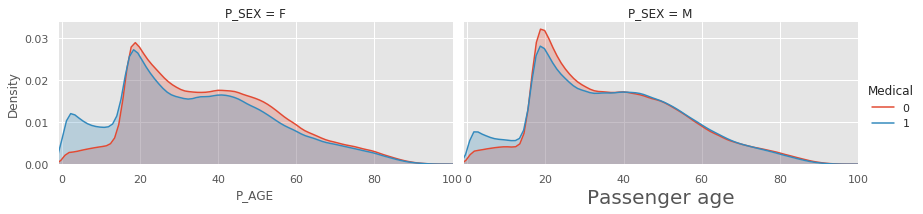

In [16]:
sns.set(font_scale = 1)
plt.style.use('ggplot')

g = sns.FacetGrid(data = data.dropna(), hue = 'Medical',col = 'P_SEX',aspect=2)
(g.map(sns.kdeplot, 'P_AGE', shade = True).set_axis_labels("P_AGE","Density").add_legend())
plt.xlim([-1,100])
plt.xlabel('Passenger age', fontsize = 20)

plt.savefig('../Figs/accident_density_vs_age.pdf')

##  Which vehicle model year was involved in most collisions with medical needs?

(1970, 2020)

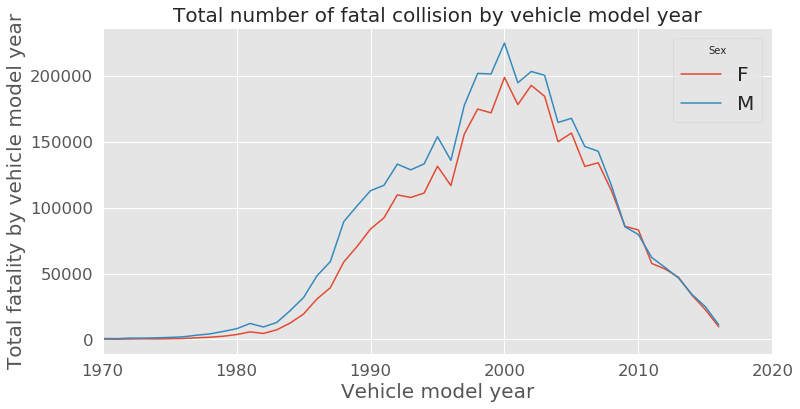

In [17]:
# Set figure size
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

# Plot figure
pivot_tab_v_year = data.pivot_table('FATAL', index = 'V_YEAR', columns = 'P_SEX', aggfunc = 'sum')
pivot_tab_v_year.plot(figsize = (12,6))

plt.xlabel('Vehicle model year', fontsize = 20)
plt.ylabel('Total fatality by vehicle model year', fontsize = 20)
plt.legend(title = 'Sex', fontsize = 20)
plt.title('Total number of fatal collision by vehicle model year', fontsize = 20)
plt.savefig('../Figs/medical_needs_vs_vehicle_yr.pdf')
plt.xlim([1970,2020])

- The vehicle models in the year 2000 & 2001  caused the most fatal collisions and they were driven mostly by males

## What is the medical collision distribution of vehicle model year by gender

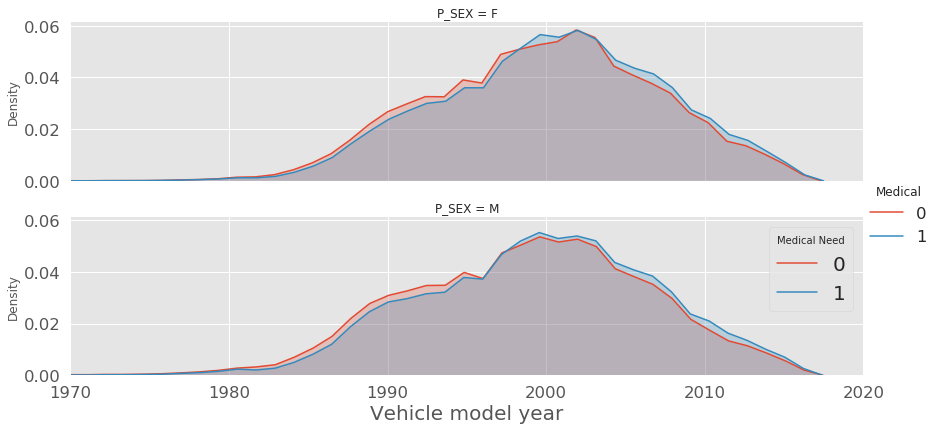

In [18]:
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

g = sns.FacetGrid(data = data.dropna(), hue = 'Medical', row = 'P_SEX', aspect =4)  
(g.map(sns.kdeplot, 'V_YEAR', shade = True).set_axis_labels("Vehicle model year","Density").add_legend())
plt.xlim([1970,2020])
plt.xlabel("Vehicle model year", fontsize = 20)
plt.legend(title = 'Medical Need', fontsize = 20)
plt.savefig('../Figs/density_by_ medical_need_vs_vehicle_yr.pdf')

- The new vehicle models from 2005 to present seem to be involved in mostly non-fatal collisions.

##  What is the medical needs rate of males and  females each year?

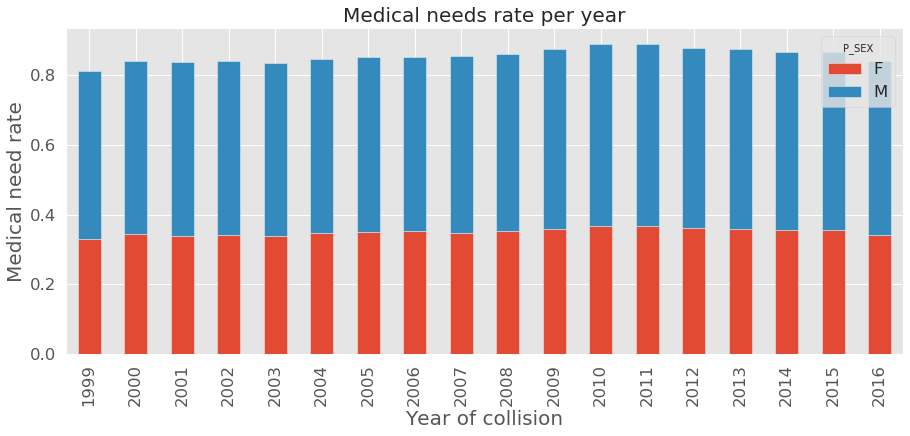

In [19]:
# Plot size
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

# Plot figure
table_year = data.pivot_table('Medical', index = 'C_YEAR', columns = 'P_SEX', aggfunc = 'mean')
table_year.plot(kind = 'bar', stacked = True,figsize = (15,6))

plt.xlabel('Year of collision', fontsize = 20)
plt.ylabel('Medical need rate', fontsize = 20)
plt.title('Medical needs rate per year', fontsize = 20)
plt.savefig('../Figs/medical_need_rate_yr.pdf')

We can see that
 
- most vehicle collisions occur  in the year 1999, 2006, and 2007.

- more males got involved in a vehicle collision than females

## What type of vechicle resulted to more hospitalization?

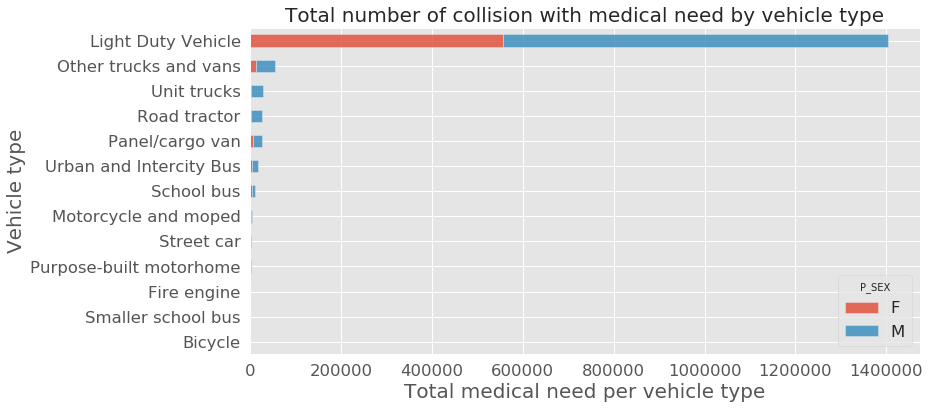

In [20]:
# Set figure size
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

# Plot figure
table_vtype = data.pivot_table('Medical', index = 'V_TYPE', columns = 'P_SEX', aggfunc = 'sum')
table_vtype.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (12,6), alpha =0.8)

plt.ylabel('Vehicle type', fontsize=20)
plt.xlabel('Total medical need per vehicle type', fontsize=20)
plt.legend(loc= 'lower right', title = 'P_SEX')
plt.title('Total number of collision with medical need by vehicle type', fontsize=20)
plt.savefig('../Figs/vehicle_type_medical_hist.pdf')

- Most fatal accident are caused by light duty vehicles

##  What is the medical need rate per day?

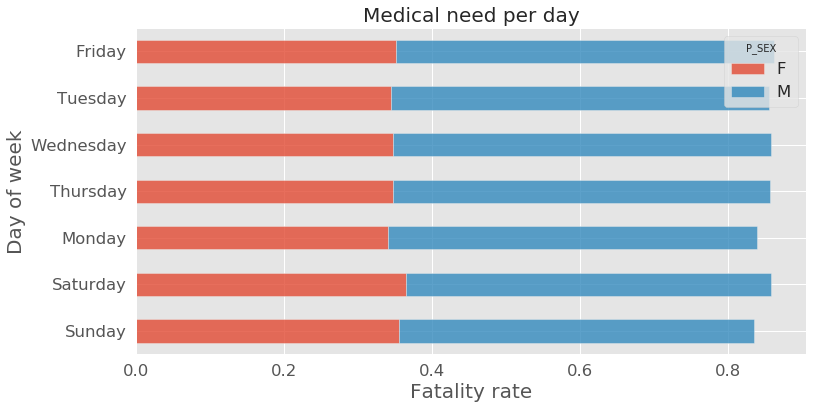

In [21]:
# Set figure size
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

# Plot figure
#order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']
#.loc[order]
table_day = data.pivot_table('Medical', index = 'C_WDAY', columns = 'P_SEX', aggfunc = 'mean')
table_day.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (12,6), alpha =0.8)

plt.xlabel('Fatality rate',fontsize =20)
plt.ylabel('Day of week',fontsize =20)
plt.legend(title = 'P_SEX')
plt.title('Medical need per day',fontsize =20)
plt.savefig('../Figs/daya_of_wee_medical_need.pdf')

- Most fatal accidents occur on weekends

##  What is the medical need rate per month?

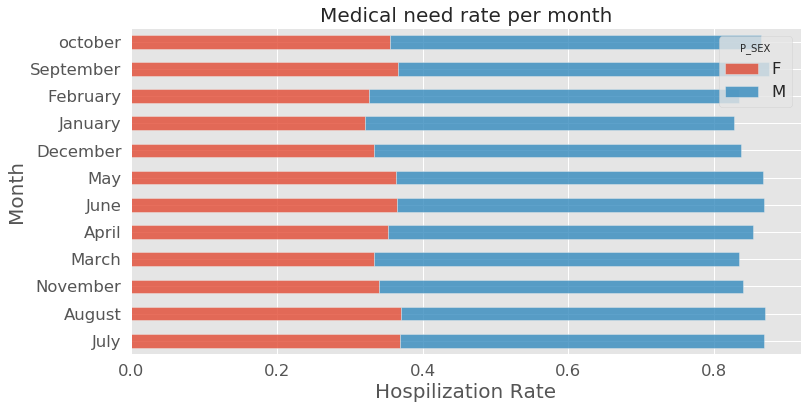

In [22]:
# Set figure size
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

# order =['January','February','March', 'April','May', 'June',  
#     'July','August','September', 'october','November','December']
#.loc[order]        
# Plot figure
table_month = data.pivot_table('Medical', index = 'C_MNTH', columns = 'P_SEX', aggfunc = 'mean')
table_month.sort_values(by =['M']).plot(kind = 'barh', stacked = True, figsize = (12,6), alpha =0.8)
plt.ylabel('Month', fontsize =20)
plt.xlabel('Hospilization Rate', fontsize =20)
plt.legend(title = 'P_SEX')
plt.title('Medical need rate per month', fontsize =20)
plt.savefig('../Figs/Month_medical_need.pdf')

- Most fatal accidents occur in July and August, that is during the summer weather

##  What is the fatality rate by weather condition?

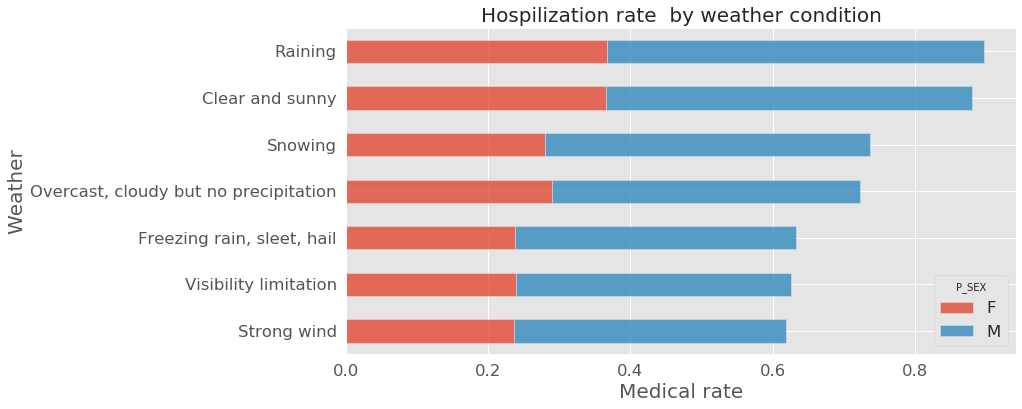

In [23]:
# Set figure size
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

# Plot figure
table_weather = data.pivot_table('Medical', index = 'C_WTHR', columns = 'P_SEX', aggfunc = 'mean')
table_weather.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (12,6), alpha =0.8)

plt.ylabel('Weather', fontsize=20)
plt.xlabel('Medical rate', fontsize=20)
plt.legend(title = 'P_SEX')
plt.title('Hospilization rate  by weather condition', fontsize=20)
plt.savefig('../Figs/Weather_hospilization.pdf')

- The fatal collisions occur mostly due to visibility limitation

In [24]:
male = table_weather['M']
male.head()

C_WTHR
Clear and sunny                          0.515442
Freezing rain, sleet, hail               0.395823
Overcast, cloudy but no precipitation    0.432494
Raining                                  0.531092
Snowing                                  0.457637
Name: M, dtype: float64

Text(0.5, 1.0, 'Fatality rate  by weather condition')

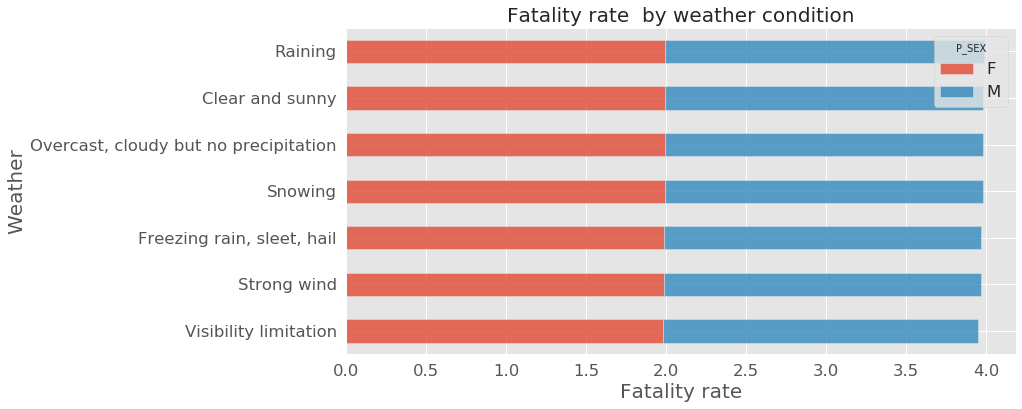

In [26]:
# Set figure size
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

# Plot figure
table_weather = data.pivot_table('FATAL', index = 'C_WTHR', columns = 'P_SEX', aggfunc = 'mean')
table_weather.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (12,6), alpha =0.8)

plt.ylabel('Weather', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.legend(title = 'P_SEX')
plt.title('Fatality rate  by weather condition', fontsize=20)
#plt.savefig('../figures/fig10.pdf')

##  What is the fatality rate by road configuration?

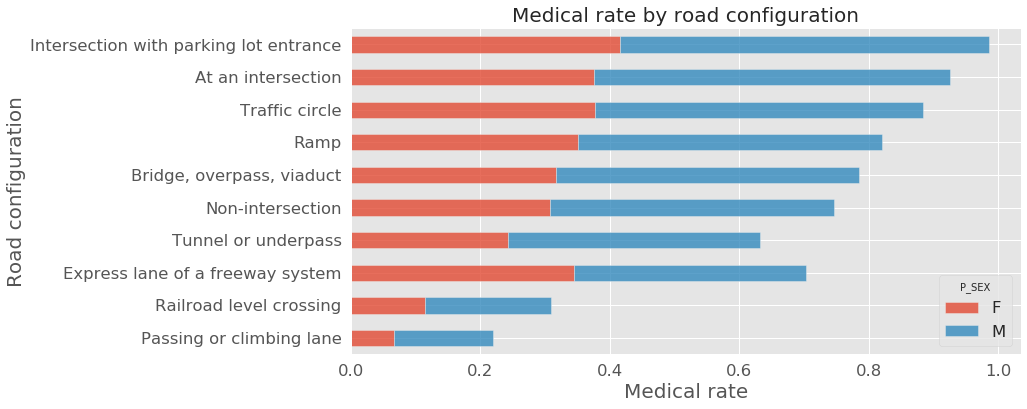

In [27]:
# Set figure size
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

# Plot figure
table_road = data.pivot_table('Medical', index = 'C_RCFG', columns = 'P_SEX', aggfunc = 'mean')
table_road.sort_values(by =['M']).plot(kind = 'barh', 
                                                    stacked = True,figsize = (12,6), alpha =0.8)
plt.ylabel('Road configuration', fontsize=20)
plt.xlabel('Medical rate', fontsize=20)
plt.legend(title = 'P_SEX')
plt.title('Medical rate by road configuration', fontsize=20)
plt.savefig('../Figs/road_config.pdf')

- Most fatal accidents occur at passing or climbing lane